# Практическая работа №1: Алгоритмы эффективного вычисления одночленов

Выполнила студентка гр. 1304 Нго Тхи Йен. Вариант №43.

## Цель работы

Сформировать знания о работе алгоритмах вычисления одночленов за
минимальное число операций, привить навык использования систем ком-
пьютерной математики для реализации алгоритмов.

## Основные теоретические положения

Рассмотрим методы вычисления одночленов за минимальное число операций, а также приведём некоторые оценки количества операций для вычисления одночленов.<br>
Введём понятия для оценки числа операций:<br>
$\lambda(n) = \lfloor log_{2}(n) \rfloor$ - уменьшенная на 1 длина бинарной записи n<br>
$\nu(n)$ - вес Хэмминга для бинарной записи числа $n$ (число единиц в бинарной записи)

### Бинарный метод $SX$

Бинарный метод - это один из алгоритмов быстрого возведения числа $x$ в некоторую степень $n\in \mathbb{N}$.

Алгоритм заключается в следующем: для начала числа $x$ представляется в двоичном виде, после чего из этого двоичного представления удаляется старший бит (единица). Далее в цикле просматриваются биты от старшего к младшему: на каждой итерации $x$ умножается на себя, при этом если очередной бит числа равен 1, то к результату произведения прибавляется $x$. 

Количество операций, требуемых для возведения числа $x$ в степень $n$, для данного метода равно $\lambda(n)+\nu(n)-1$, где $\lambda(n)=\lceil log_2(n) \rceil$, а $\nu(n)$ равно количеству единиц в двоичной записи числа $n$.
    
### Бинарный метод возведения справа налево 
Далее представлен алгоритм для возведения в степень $n$ (т. е. вычисления $x^n$) методом справа налево:
<ol>
    <li>На нулевой итерации поставим $N = n; Y = 1; Z = x$</li>
    <li>Если $N$ чётно - переходим на пункт 3, иначе - на пункт 4</li>
    <li>Переприсваиваем $N = \lfloor N/2 \rfloor; Z = Z * Z$; переходим на пункт 2</li>
    <li>Переприсваиваем $N = \lfloor N/2 \rfloor; Y = Z * Y$</li>
    <li>Если $N = 0$, то возвращаем $Y$ как ответ и выходим из алгоритма. Иначе - переприсваиваем $Z = Z * Z$ и переходим на пункт 2</li>
</ol>
Число операций для бинарного метода справа налево можно записать следующим образом: $\lambda(n) + \nu(n)$

### Метод множителей
Далее представлены шаги возведения в степень $n$ методом множителей:
<ol>
    <li>Представим $n$ в виде разложения $n = p * q$, где $p$ - наименьший простой множитель $n$, а $q > 1$. Таким образом, $x^n$ можно найти, вычислив $x^p$ и возведя эту величину в степень $q$</li>
    <li>Если $n$ - простое, то вычислим $x^{n-1}$ и умножим его на x</li>
    <li>При $n = 1$ - получим $x^n$</li>
</ol>
Следуя этим шагам можно раскладывать (тем самым вычисляя) $p$ на любом шаге, и в конце концов получить $x^n$

### Дерево степеней
Далее представлен алгоритм построения дерева степеней до $k$-го уровня:
<ol>
    <li>На нулевом уровне в дереве только один узел - $1$. Это корень дерева</li>
    <li>$k+1$-й уровень строим так: берём каждый узел $i$ на $k$-м уровне слева направо и присоединяем узлы $i+a_{0}, i+a_{1}, ..., i+a_{k-1}$</li>
    <li>При этом, если узел уже появлялся - он не добавляется</li>
</ol>


## Постановка задачи

Реализовать алгоритмы вычисления мономов за минимальное число операций с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### Бинарный метод SX
Реализуем функцию $Sx$, принимающую на вход целочисленное значение, являющееся степенью, в которую нужно возвести переменную. Внутри функции значение степени записывается в двоичном виде, при этом обрезается старший бит. Далее, по алгоритму, единицы заменяются на $SX$, двойки - на $S$. Переменная $tmp$ будет хранить итоговое значение, которое мы получим в ходе итерации по преобразованной $SX$-строке. Для наглядности выведем $SX$-строку, а также значение $tmp$ на каждой итерации алгоритма в виде (номер итерации: значение $tmp$).


In [1]:
def Sx(n):
    if n < 1:
        return 1
    bin_bez1 = str(bin(n))[3:]
    amount_steps = bin_bez1.replace('1','SX').replace('0', 'S')
    tmp = x
    show(amount_steps)
    for i, step in enumerate(amount_steps):
        if step == 'X':
            tmp = x * tmp
        else:
            tmp = tmp ** 2
        print(f"({i + 1}: {tmp})")
    return tmp

Приведём пример работы программы на нескольких $n$, а именно $13, 37, 59$: 

In [2]:
show(Sx(13))

'SXSSX'

(1: x^2)
(2: x^3)
(3: x^6)
(4: x^12)
(5: x^13)


x^13

In [3]:
show(Sx(37))

'SSSXSSX'

(1: x^2)
(2: x^4)
(3: x^8)
(4: x^9)
(5: x^18)
(6: x^36)
(7: x^37)


x^37

In [4]:
show(Sx(59))

'SXSXSSXSX'

(1: x^2)
(2: x^3)
(3: x^6)
(4: x^7)
(5: x^14)
(6: x^28)
(7: x^29)
(8: x^58)
(9: x^59)


x^59

Проверим оценку числа операций для данных $n$:<br>
$n = 13 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 3; \nu(n) = 3; \lambda(n) + \nu(n) - 1 = 5 \Rightarrow$ Верно<br>
$n = 37 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 5; \nu(n) = 3; \lambda(n) + \nu(n) - 1 = 7 \Rightarrow$ Верно<br>
$n = 59 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 5; \nu(n) = 5; \lambda(n) + \nu(n) - 1 = 9 \Rightarrow$ Верно<br>
Можно сделать вывод, что для наших $n$ формула для вычисления количества операций корректна.
#### Вывод
Таким образом, реализован бинарный метод $SX$, проверена его работоспособность и оценка числа операций из теоретического положения. Метод является простым для реализации и понимания, при этом позволяет быстро вычислить одночлен. Также, благодаря оценке можно легко узнать, за сколько итераций будет произведён расчёт (ввиду того, что на каждой итерации только одна операция).

### 2. Метод возведения справа налево

Реализуем функцию $RightLeft$, принимающую на вход целочисленное значение, являющееся степенью, в которую нужно возвести переменную. Внутри функции реализована инициализация нулевой итерации из теоретического положения (пункт 1), а также основной алгоритм (пункты 2 - 5). Реализована возможность вывода промежуточных значений $A, B, C$ (путём передачи в функцию помимо степени значения $True$ вторым аргументом).

In [5]:
def RightLeft(n, inter_Info = False):
    access = 0
    A = 1
    B = n
    C = var('x')
    while True:
        if B % 2 == 0:
            B = floor(B / 2)
            C = C * C
        else:
            B = floor(B / 2)
            A = C * A
            if (B == 0):
                access += 1
                break
            else:
                C = C * C
        access += 1
        if (inter_Info): print(f"iteration: {access}\nB: {B}\nA: {A}\nC: {C}\n")
    if (inter_Info): print(f"iteration: {access}\nB: {B}\nA: {A}\nC: {C}\n")
    return A

Приведем пример программы, работающей с некоторыми $n$, а именно с $13, 37, 59$. Для каждого $n$ мы отобразим результаты в таблице:

In [6]:
show(RightLeft(13))

x^13

##### Листинг работы алгоритма для n = 13:


| № итерации | Значение B | Значение A | Значение C |
|:----------:|:----------:|:----------:|:----------:|
|      0     |     13     |      1     |      $x$     |
|      1     |     6     |      $x$     |    $x^2$   |
|      2     |       3    |      $x$     |     $x^4$    |
|      3     |      1     |      $x^5$     |     $x^8$    |
|      4     |      0     |      $x^{13}$     |    $x^8$    |
|      

In [7]:
show(RightLeft(37))

x^37

##### Листинг работы алгоритма для n = 37:

| № итерации | Значение B | Значение A | Значение C |
|:----------:|:----------:|:----------:|:----------:|
|      0     |     37     |      1     |     $x$    |
|      1     |     18     |     $x$    |    $x^2$    |
|      2     |     9     |     $x$    |    $x^4$   |
|      3     |      4     |     $x^5$    |    $x^8$   |
|      4     |      2     |    $x^5$   |  $x^{16}$  |
|      5     |      1     |  $x^5$  |  $x^{32}$  |
|      6     |      0     |  $x^{37}$  |  $ x^{32}$ |

In [8]:
show(RightLeft(59))

x^59

##### Листинг работы алгоритма для n = 59:

| № итерации | Значение B | Значение A | Значение C |
|:----------:|:----------:|:----------:|:----------:|
|      0     |     59     |      1     |     $x$    |
|      1     |      29     |     $x$    |    $x^2$    |
|      2     |      14     |     $x^3$    |    $x^4$   |
|      3     |      7     |    $x^3$   |    $x^8$   |
|      4     |      3     |  $x^{11}$  |   $x^{16}$  |
|      5     |      1     |  $x^{27}$    |   $x^{32}$ |
|      6     |      0     |  $x^{59}$   |    $x^{32}$ |

Проверим оценку числа операций для данных $n$:<br>
$n = 13 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 3; \nu(n) = 3; \lambda(n) + \nu(n)  = 6 \Rightarrow$ Верно<br>
$n = 37 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 5; \nu(n) = 3; \lambda(n) + \nu(n)  = 8 \Rightarrow$ Верно<br>
$n = 59 \Rightarrow \lambda(n) = \lfloor log_{2}(n) \rfloor = 5; \nu(n) = 5; \lambda(n) + \nu(n)  = 10 \Rightarrow$ Верно<br>
Можно сделать вывод, что для наших $n$ формула для вычисления количества операций корректна.
#### Вывод
Таким образом, реализован бинарный метод возведения справа налево, проверена его работоспособность и оценка числа операций из теоретического положения. Метод является менее простым для понимания, нежели метод возведения $SX$, а также требует на одну операцию больше, что подтверждено на практике. При этом легко можно вычислить число операций для данного метода по формуле $\lambda(n) + \nu(n)$. В общем случае после завершения алгоритма значение $Z$ будет равно $x^{2^{k-2}}$, где $k$ - число итераций метода.

### 3. Сравнение бинарного метода "SX" и метод возведения справа налево

Исходя из оценки, число операций в методе справа налево больше, чем в методе $SX$. Число итераций в методе справа налево можно оценить как $\lfloor log_{2}(n) \rfloor + 2$. В методе $SX$ же число итераций равно $\lambda(n) + \nu(n) - 1$.
Таким образом, бинарный метод $SX$ выгоднее возведения справа налево.

### 4. Метод множителей

Метод множителей - метод быстрого возведения в степень числа $x^n$. Число n раскладывается на произведение двух множителей: $n = i * j$, где $i$ - наименьший простой множитель. Далее сначала $x$ возводится в степень $i$, а затем получившееся число в тепень $i$. Если $n$- простое число, то на множители раскладывается число $n - 1$ и после получения результата домножаем на $x$


Выполним метод множителей вручную для $n= 13, n = 37, n = 59$ по алгоритму, приведённому в теоретическом положении.<br>

#### Метод множителей для n = 13
$x^{13} = x * x^{12}$<br>
$x^{12} = (x^2)^6$<br>
$(x^2)^6 = ((x^2)^2)^3$<br>
Рассчитаем нужные значения<br>
$x^2 \rightarrow x, x^2$ (1 операция)<br>
$(x^2)^2 \rightarrow x^2, (x^2)^2$ (+1 операция)<br>
$x^{12} = ((x^2)^2)^3 = (x^2)^2, ((x^2)^2)^2, ((x^2)^2)^3$ (+2 операция)<br>
$x^{13} = x^{12} * x$ (+1 операция)<br>
Итого 5 операций.

#### Метод множителей для n = 37
$x^{37} = x * x^{36}$<br>
$x^{36} = (x^{2})^{18}$<br>
$(x^{2})^{18} = ((x^{2})^{2})^{9}$<br>
$((x^{2})^{2})^{9} = (((x^{2})^{2})^{3})^{3}$<br>
Рассчитаем нужные значения<br>
$x^2 \rightarrow x, x^2$ (1 операции)<br>
$(x^2)^2 \rightarrow x^2, (x^2)^2$ (+1 операция)<br>
$((x^2)^2)^3 \rightarrow (x^2)^2, ((x^2)^2)^2, ((x^2)^2)^3$ (+2 операции)<br>
$(x^2)^{18} = (((x^2)^2)^3)^3 \rightarrow ((x^2)^2)^3, (((x^2)^2)^3)^2, (((x^2)^2)^3)^3$ (+2 операции)<br>
$x^{37}=x * x^{36}$ (+1 операция)<br>
Итого 7 операций.

#### Метод множителей для n = 59
$x^{59} = x * x^{58}$<br>
$x^{58} = (x^2)^{29}$<br>
$(x^2)^{29} = (x^2)*(x^2)^{28}$<br>
$(x^2)^{28} = ((x^2)^2)^{14}$<br>
$((x^2)^2)^{14} = (((x^2)^2)^2)^{7}$<br>
$(((x^2)^2)^2)^{7} = ((x^2)^2)^2) * (((x^2)^2)^2)^{6}$<br>
$(((x^2)^2)^2)^{6} = ((((x^2)^2)^2)^2)^3$<br> 
Рассчитаем нужные значения<br>
$x^2 \rightarrow x, x^2$ (1 операция)<br>
$(x^2)^2 \rightarrow x^2, (x^2)^2$ (+1 операция)<br>
$((x^2)^2)^2 \rightarrow (x^2)^2, ((x^2)^2)^2$ (+1 операция)<br>
$(((x^2)^2)^2)^2 \rightarrow ((x^2)^2)^2, (((x^2)^2)^2)^2$ (+1 операция)<br>
$x^{58} = (((x^2)^2)^2)^2)^3 \rightarrow (((x^2)^2)^2)^2, ((((x^2)^2)^2)^2)^2, ((((x^2)^2)^2)^2)^3$ (+2 операция)<br>
$x^{59} = x^{58} * x$ (+1 операция)<br>
Итого 7 операций.

Также рассмотрим $n=15$, при котором метод множителей быстрее $SX$.

$x^{15} = (x^3)^5$
$x^{5} = x * x^4$
Рассчитаем нужные значения
$x^2 \rightarrow x, x^2, x^3$ (2 операции)<br>
$x^4 \rightarrow x, x^2, x^4$ (+2 операция)<br>
$x^5 \rightarrow x^4, x^5$ (+1 операция)<br>
Итого 5 операций (против 6 у метода $SX$)<br>
#### Вывод
Поэтому рассматривается метод умножения числа $n$. Его преимущества заключаются в ясности и простоте идей, возможности легкого подсчета количества операций возведения числа в степень «вручную». Кроме того, экспоненциальный метод может быть быстрее бинарного (например, для $n=15$). Его минус — сложность реализации (скорее всего, придется использовать рекурсию)


### 5. Построение дерева степеней

Реализуем алгоритм построения дерева «дерева степеней» ($buildTree$) до заданного уровня $k$. На вход функции подаётся количество уровней, которые надо построить.

In [33]:
def buildTree(n):
    ans = False
    dTree = Graph()
    dTree.add_vertex(1)
    addVertices = [1]
    while ans == False:
        newVertices = []
        for elemt in addVertices:
            path = dTree.shortest_path(1, elemt)
            for vert in path:
                new_vertice = elemt + vert
                if new_vertice not in dTree.vertices():
                    dTree.add_vertex(new_vertice)
                    dTree.add_edge(elemt, new_vertice)
                    newVertices.append(new_vertice)
                    if new_vertice == n:
                        ans = True
        addVertices = newVertices 
    return dTree

С помощью $GetEdgesNode$ строим список кортежей-рёбер графа, благодаря которому можем выделить цветом путь от вершины дерева до заданного числа n.

In [34]:
def GetEdgesNode(tree, vertice):
    path = []
    res = tree.shortest_path(1, vertice)
    for i in range(len(res )-1):
        path.append((res[i], res[i+1]))
    return path

С помощью $showTree$ отображаем дерево и путь до вершины, если таковая есть.

In [35]:
def showTree(n):
    tree = buildTree(n)
    plt = tree.plot(layout = 'tree', tree_root = 1, figsize=(15, 6), vertex_color = 'lightgreen', edge_colors={(1, 0, 0): GetEdgesNode(tree, n)})
    plt.show()

Ниже представлены результаты работы программы

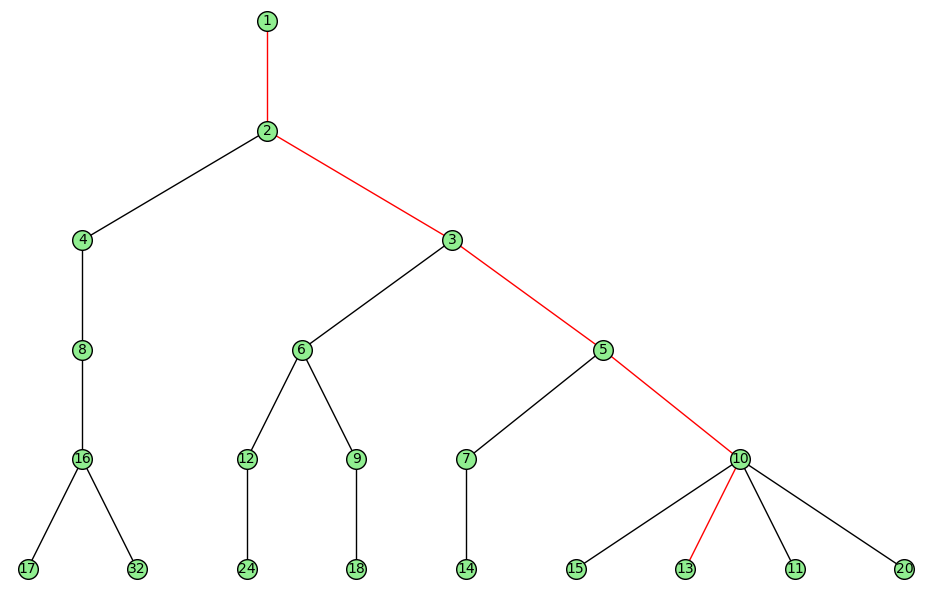

In [36]:
showTree(13)

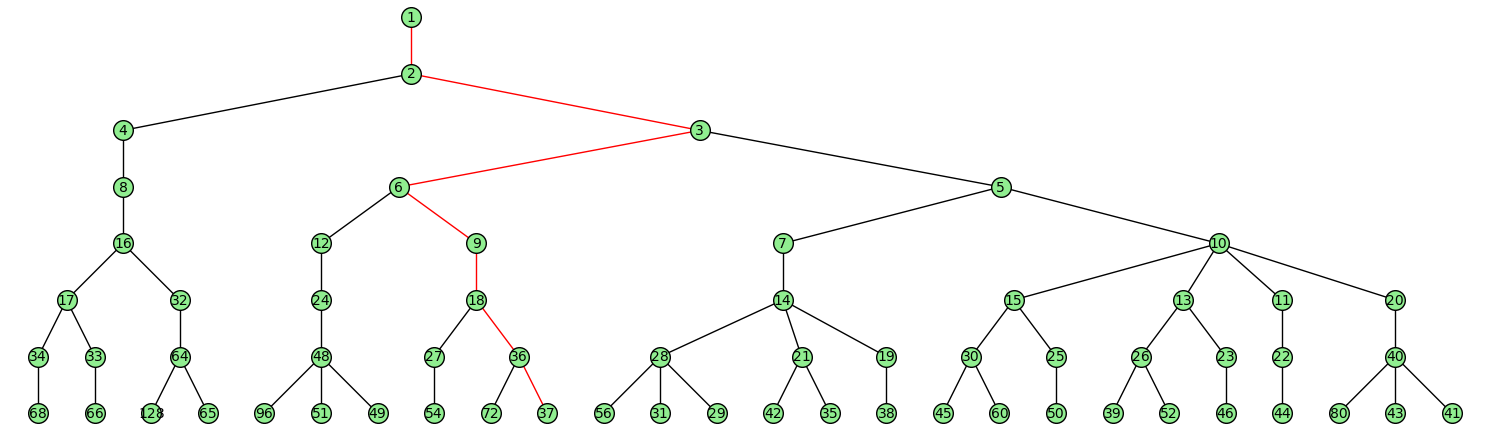

In [37]:
showTree(37)

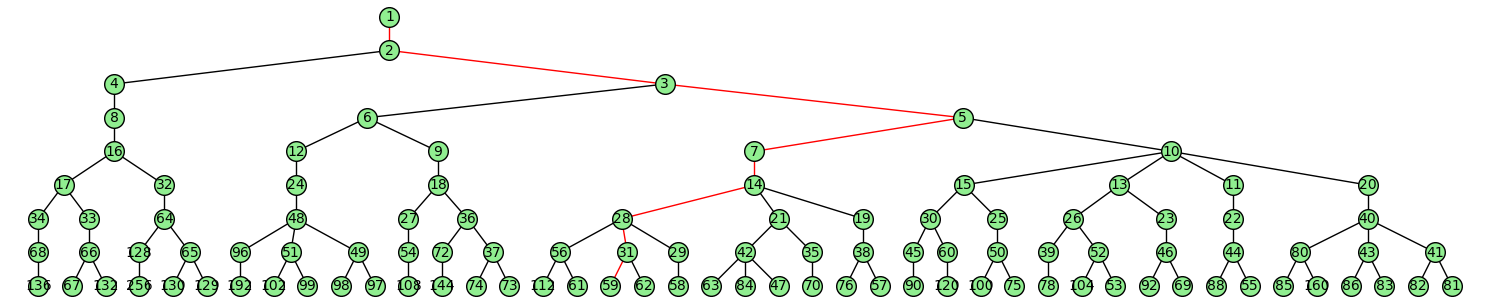

In [38]:
showTree(59)

Теперь напишем функцию для сравнения двух методов



In [39]:
def SXAndTreeComparison():
    tree = buildTree(3000)
    for i in range(2, 1000):
        if (floor(log(i, 2)) + bin(i)[2:].count('1') - 1) < len(tree.shortest_path(1, i)) - 1:
            print("not ОК")
            return
    print("ОК")
    
SXAndTreeComparison()

ОК


#### Вывод
Таким образом, реализуется алгоритм «дерева степеней». Получается, что для рендеринга дерева с помощью SageMath до определенного k нужно раскрасить путь от вершины дерева до определенного числа n. В результате сравнения этого метода с бинарным 𝑆𝑋- мы обнаруживаем, что дерево степеней его не теряет (и поэтому метод выигрывает справа налево). Кроме того, дерево мощности лучше, чем метод умножения (лучше, чем количество используемых умножений).

### 6. Изменённое дерево степеней

Сделаем так, чтобы узлы, расположенные ниже узла $i$ присоединялись в порядке убывания:<br>
$i+a_{k-1}, ..., i+a_{1},i+a_{0}$<br>
Получится дерево убывающих степеней. 

In [21]:
def descendBuildTree(n):
    ans = False
    dTree = Graph()
    dTree.add_vertex(1)
    addVertices = [1]
    while ans == False:
        newVertices = []
        for elemt in addVertices:
            path = dTree.shortest_path(1, elemt)
            for vert in path:
                newVertice = elemt + vert
                if newVertice not in dTree.vertices():
                    dTree.add_vertex(newVertice)
                    dTree.add_edge(elemt, newVertice)
                    newVertices.append(newVertice)
                    if newVertice == n:
                        ans = True
        addVertices = sorted(newVertices)[::-1]
    return dTree

In [27]:
def showDescendTree(n):
    tree = descendBuildTree(n)
    plt = tree.plot(layout = 'tree', tree_root = 1, figsize=(15, 6),vertex_color = 'lightgreen', edge_colors={(1, 0, 0): GetEdgesNode(tree, n)})
    plt.show()
    

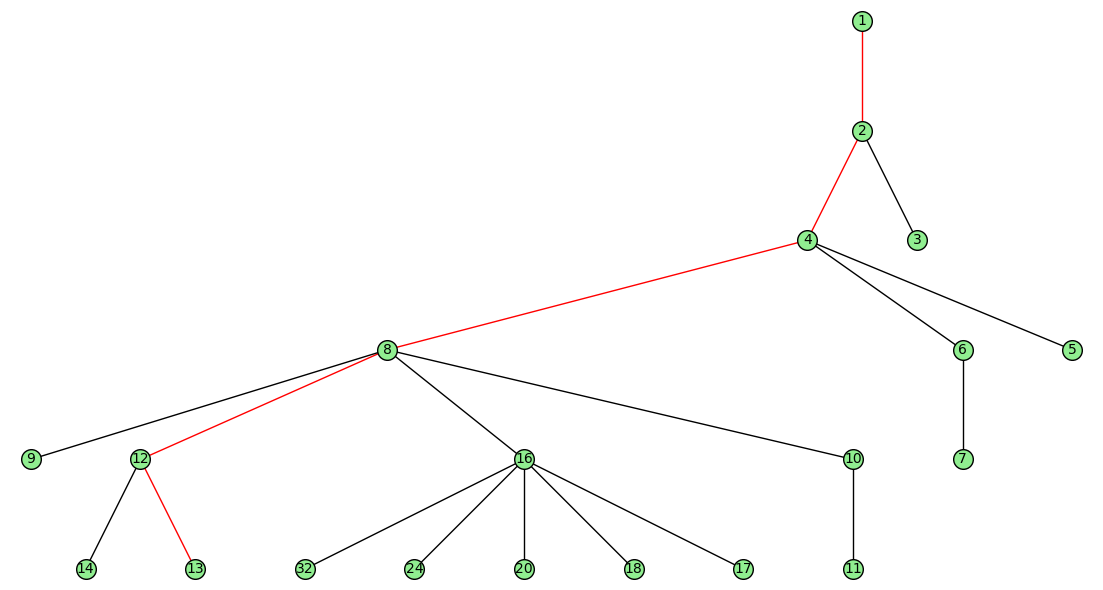

In [28]:
showDescendTree(13)

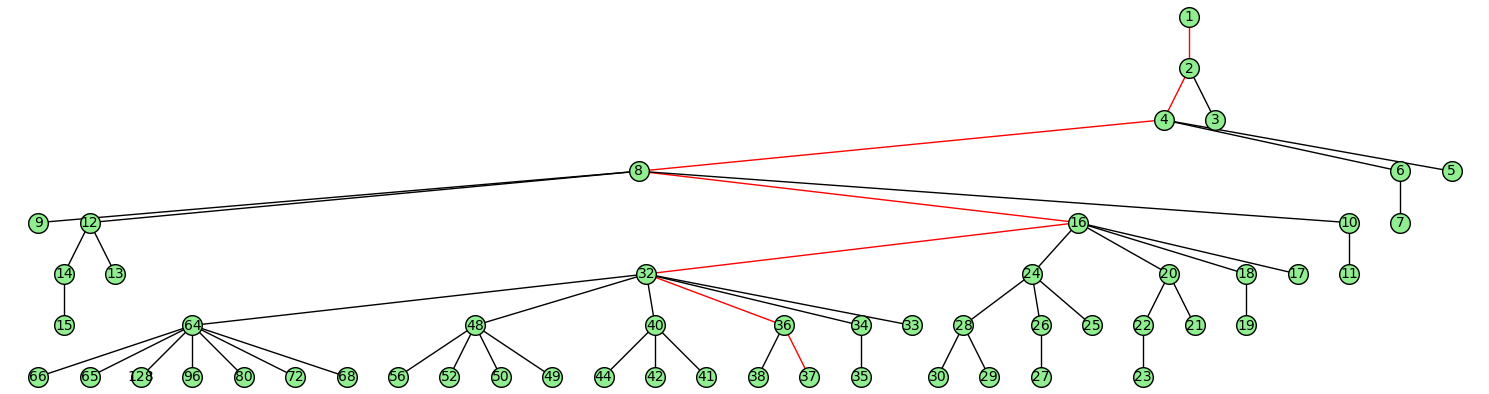

In [29]:
showDescendTree(37)

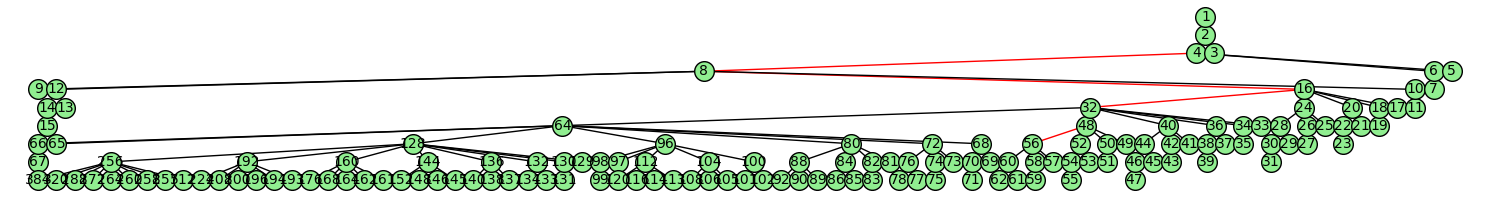

In [30]:
showDescendTree(59)

In [32]:
def SxAndDescendTreeComparison():
    tree = descendBuildTree(3500)
    for i in range(2, 1000):
        if (floor(log(i, 2)) + bin(i)[2:].count('1') - 1) != len(tree.shortest_path(1, i)) - 1:
            print("not ОК")
            return
    print("ОК")
    
SxAndDescendTreeComparison()

ОК


## Выводы

Сформированы знания о работе алгоритмов вычисления одночленов за минимальное число операций, привит навык использования системы компьютерной алгебры *SageMath* для реализации алгоритмов.<br>
Реализован бинарный метод $SX$, бинарный метод возведения в степень справа налево, рассмотрен метод множителей и реализован алгоритм "дерева степеней". 
Реализовано дерево убывающих степеней, произведено сравнение с бинарным методом $SX$.<br>